### Trains a simple NN on the MNIST dataset

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 34s 3us/step


In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


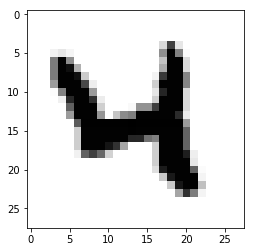

In [4]:
plt.imshow(train_images[20], cmap='binary')
plt.show()

In [5]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [6]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(28*28,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    batch_size=64, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4167 - acc: 0.8836 - val_loss: 0.2446 - val_acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2179 - acc: 0.9374 - val_loss: 0.1896 - val_acc: 0.9448
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1721 - acc: 0.9503 - val_loss: 0.1597 - val_acc: 0.9534
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1448 - acc: 0.9582 - val_loss: 0.1416 - val_acc: 0.9575
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1268 - acc: 0.9632 - val_loss: 0.1283 - val_acc: 0.9615
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1126 - acc: 0.9670 - val_loss: 0.1228 - val_acc: 0.9623
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1023 - acc: 0.9699 - val_loss: 0.1210 - val_acc

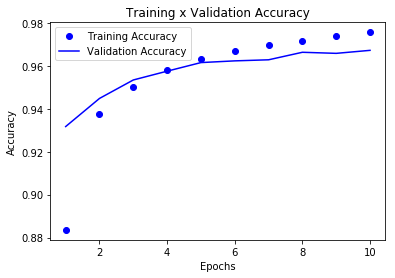

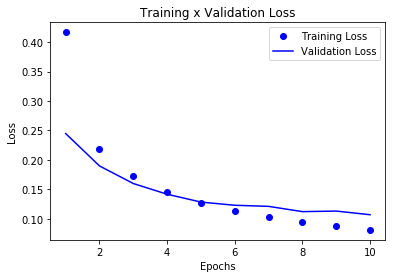

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training x Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training x Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()